In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [53]:
df= pd.read_csv('https://raw.githubusercontent.com/Jhanzkie16/BSIS_Jann2/refs/heads/main/StudentsPerformance1.csv')

In [54]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [55]:
df['gender'] = df['gender'].astype('category')
df['gender'] = df['gender'].cat.codes

print(df)

     gender race/ethnicity parental level of education         lunch  \
0         0        group B           bachelor's degree      standard   
1         0        group C                some college      standard   
2         0        group B             master's degree      standard   
3         1        group A          associate's degree  free/reduced   
4         1        group C                some college      standard   
..      ...            ...                         ...           ...   
995       0        group E             master's degree      standard   
996       1        group C                 high school  free/reduced   
997       0        group C                 high school  free/reduced   
998       0        group D                some college      standard   
999       0        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [56]:
df['race/ethnicity'] = df['race/ethnicity'].astype('category')
df['race/ethnicity'] = df['race/ethnicity'].cat.codes

df['parental level of education'] = df['parental level of education'].astype('category')
df['parental level of education'] = df['parental level of education'].cat.codes

df['lunch'] = df['lunch'].astype('category')
df['lunch'] = df['lunch'].cat.codes

df['test preparation course'] = df['test preparation course'].astype('category')
df['test preparation course'] = df['test preparation course'].cat.codes

In [57]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
...,...,...,...,...,...,...,...,...
995,0,4,3,1,0,88,99,95
996,1,2,2,0,1,62,55,55
997,0,2,2,0,0,59,71,65
998,0,3,4,1,0,68,78,77


In [58]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [59]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [60]:
x = df.drop(columns=['parental level of education', 'test preparation course','race/ethnicity','lunch'])

In [61]:
y = df[['math score', 'reading score', 'writing score']]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int8 
 1   race/ethnicity               1000 non-null   int8 
 2   parental level of education  1000 non-null   int8 
 3   lunch                        1000 non-null   int8 
 4   test preparation course      1000 non-null   int8 
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), int8(5)
memory usage: 28.4 KB


In [63]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [64]:
print(y)

     math score  reading score  writing score
0            72             72             74
1            69             90             88
2            90             95             93
3            47             57             44
4            76             78             75
..          ...            ...            ...
995          88             99             95
996          62             55             55
997          59             71             65
998          68             78             77
999          77             86             86

[1000 rows x 3 columns]


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [66]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [67]:
y_pred = model.predict(x_test)

In [68]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.3488469664739008e-28
R-squared: 1.0


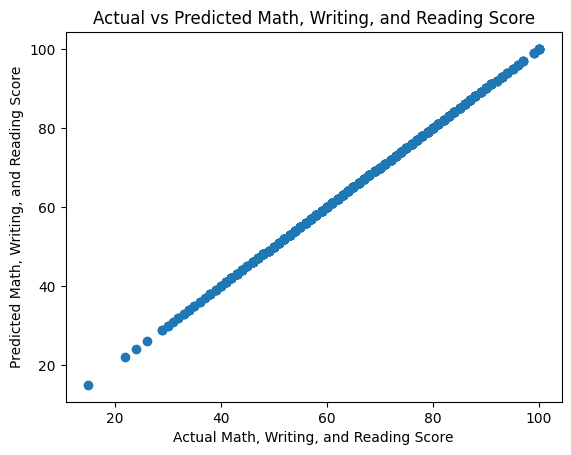

In [69]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Math, Writing, and Reading Score")
plt.ylabel("Predicted Math, Writing, and Reading Score")
plt.title("Actual vs Predicted Math, Writing, and Reading Score")
plt.show()

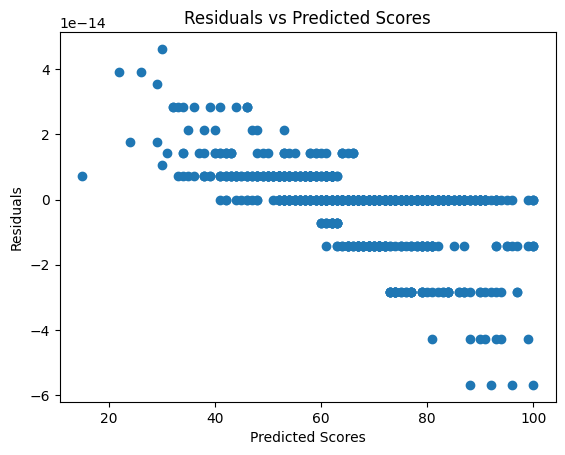

In [71]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Scores')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Scores')
plt.show()